In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_excel('mic2.xlsx',
                  engine = 'openpyxl')
                   

In [ ]:
def custom_cls(x):
    if (0<=x <=20):
        return '<= 20'
    elif(21<= x <=30):
        return '21 - 30'
    elif(31<= x <= 40):
        return '31 - 40'
    else:
        return '> 40'

In [ ]:
df['AgeGP'] = df.apply(lambda tbl: custom_cls(tbl['Age']),
                       axis = 1)
#df.head()

In [ ]:
age_gender= df.groupby(['AgeGP', 'Sex']).size()
age_gender=age_gender.to_frame()
#age_gender

In [ ]:
age_sex = pd.pivot_table(index = ['AgeGP', 'Sex'],
                         aggfunc =  len,
                         values = 'Availability',
                         data = df,
                         margins = True)
#age_sex

In [ ]:
age_gender = age_gender.rename(columns = {0:'Count'})
age_gender = age_gender.reset_index()

In [ ]:
age_gender

,AgeGP,Sex,Count
0,21 - 30,Female,11
1,21 - 30,Male,20
2,31 - 40,Female,4
3,31 - 40,Male,1
4,<= 20,Female,5
5,<= 20,Male,6
6,> 40,Female,2
7,> 40,Male,1


In [ ]:
x = age_gender.iloc[:,-1].sum()
age_gender['%']=(age_gender.iloc[:,-1]/x)*100
age_gender

,AgeGP,Sex,Count,%
0,21 - 30,Female,11,22.0
1,21 - 30,Male,20,40.0
2,31 - 40,Female,4,8.0
3,31 - 40,Male,1,2.0
4,<= 20,Female,5,10.0
5,<= 20,Male,6,12.0
6,> 40,Female,2,4.0
7,> 40,Male,1,2.0


In [ ]:
plot_order = ['<= 20', '21 - 30', '31 - 40', '> 40']

In [ ]:
import seaborn as sns

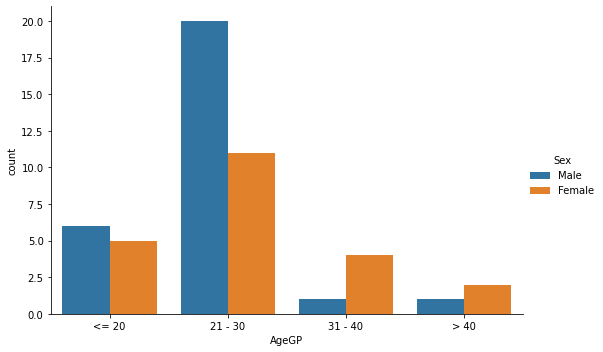

In [ ]:
from matplotlib.pyplot import draw
figg = sns.catplot( x = 'AgeGP',
                  kind = 'count',
                data = df,
                hue = 'Sex',
                order = plot_order,
                height = 5,
                aspect = 1.5)

In [ ]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import plotly.express as px

In [ ]:
fig = px.sunburst(age_gender,
                  values = 'Count',
                  path = ['Sex','AgeGP', 'Count','%'],
                  color = 'AgeGP',
                  title = 'Number pf respondents by AgeGroup and Gender')
plt.savefig('sample_data/age_groupSun.png')
fig.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
#pip install dash 

In [ ]:
import dash

In [ ]:
from dash import html 

In [ ]:
from dash import dcc

In [ ]:
#pip install jupyter_dash

In [ ]:
from jupyter_dash import JupyterDash

In [ ]:
p2 = JupyterDash(__name__)
p2.layout = html.Div(children = [html.H1('Title'),
                               dcc.Graph(figure = fig),
                               dcc.Graph(figure = fig),
                            ]
                    )
if __name__=='__main__':
  p2.run_server()

Dash app running on:


<IPython.core.display.Javascript object>